# DarkELF epsilon notebook

This notebook is meant to illustrate the basic usage of DarkELF, and shows the routines to access the ELF and the dielectric function under various assumptions.

written by Tongyan Lin & Simon Knapen, 04/20/2021

In [1]:
%matplotlib inline

import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc, rcParams
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=15)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=15)

# this needs to point to the folder where darkelf.py is stored
work_dir = os.getcwd()
sys.path.append(work_dir+"/..")
plotdir=work_dir+"/plots/"

from darkelf import darkelf, targets


Check which data grids are available for the material of interest.

In [2]:
targets.files("Ge")

Available configuration files: 
	 Ge.yaml
 
Available data for epsilon: 
	 Ge_mermin.dat
	 Ge_Migdal_FAC.dat
	 Ge_gpaw_noLFE.dat
	 Ge_epsphonon_data2K.dat
	 Ge_epsphonon_theory6K.dat
	 Ge_gpaw_withLFE.dat
 
Available data for phonon (partial) density of states: 
	 Ge_DoS.dat
 
Available data for Fn(omega) functions: 
	 Ge_Fn.dat
 
Available data for form factors: 
	 Ge_Zion.dat
	 Ge_atomic_Zion.dat


Specify a "filename" for the ELF for omega > electron band gap and a "phonon_filename" for the ELF below the electron bandgap, if desired.

In [3]:
Si = darkelf(target='Si',filename='Si_gpaw_withLFE.dat',phonon_filename="Si_epsphonon_data6K.dat")
Si_mermin = darkelf(target='Si',filename='Si_mermin.dat',phonon_filename="Si_epsphonon_data6K.dat")
Si_phonon_theory = darkelf(target='Si',filename='Si_mermin.dat',phonon_filename="Si_epsphonon_theory6K.dat")

Ge = darkelf(target='Ge',filename='Ge_gpaw_withLFE.dat',phonon_filename="Ge_epsphonon_data2K.dat")
Ge_mermin = darkelf(target='Ge',filename='Ge_mermin.dat',phonon_filename="Ge_epsphonon_data2K.dat")
Ge_phonon_theory = darkelf(target='Ge',filename='Ge_mermin.dat',phonon_filename="Ge_epsphonon_theory6K.dat")



 .... Loading files for Si
Loaded Si_gpaw_withLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave method,Journal of Physics:Condensed Matter22(2010) 253202.
phonon ELF taken or calculated from M. Ikezawa and M. Ishigame, Far-Infrared AbsorptionDue to the Two-Phonon Difference Process in Si, Journal of the Physical Society of Japan 50(1981) 3734.
Loaded Si_epsphonon_data6K.dat for epsilon in phonon regime
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
Loaded Si_atomic_Zion.dat for dark photon couplings
Loaded Si_DoS.dat for density of states
Loaded Fn(omeg

## dielectric functions

Real part

In [4]:
?Si.eps1

Signature: Si.eps1(omega, k, method='grid')
Docstring:
Real part of epsilon(omega,k)

Inputs
------
omega: float or array
    energy in eV
k: float
    energy in eV
method = "grid" (using the grid loaded in filename), "Lindhard" (free electron gas), or "phonon"
File:      ~/Documents/work/projects/DM_stuff/darkELF_public/darkelf/epsilon.py
Type:      method


In [5]:
print(Si.eps1(5.0,1000.))
print(Si.eps1(5.0,1000.,method="Lindhard"))
print(Si.eps1(0.1,0.0,method="phonon"))
print(Si.eps1([5.0,10],1000.)) # can be broadcasted over a list of omega

9.860192398495757
6.539557197348618
11.902500000000002
[ 9.8601924  -1.71897475]


imaginary part

In [5]:
?Si.eps2

Signature: Si.eps2(omega, k, method='grid')
Docstring:
Imaginary part of epsilon(omega,k)

Inputs
------
omega: float or array
    energy in eV
k: float
    energy in eV
method = "grid" (using the grid loaded in filename), "Lindhard" (free electron gas), or "phonon"
File:      ~/Documents/work/projects/DM_stuff/darkELF_public/darkelf/epsilon.py
Type:      method


In [7]:
print(Si.eps2(5.0,1000.))
print(Si.eps2(5.0,1000.,method="Lindhard"))
print(Si.eps2(0.1,0.0,method="phonon"))
print(Si.eps2([5.0,10],1000.)) # can be broadcasted over a list of omega

4.160907627999158
19.059927007299258
0.0007193363585786346
[4.16090763 2.08414923]


ELF

In [8]:
?Si.elf

In [9]:
print(Si.elf(5.0,1000.))
print(Si.elf(5.0,1000.,method="Lindhard"))
print(Si.elf(0.07,0.0,method="phonon"))
print(Si.elf([5.0,10],1000.)) # can be broadcasted over a list of omega

0.0363282092738552
0.0469402423105601
1.2349807697483523e-05
[0.03632821 0.28555653]


##  The optical regime (k=0), electron regime

This limit is relevant for absorption. Experimental data is also easier to find in this limit. Comparison between GPAW, mermin and experimental data

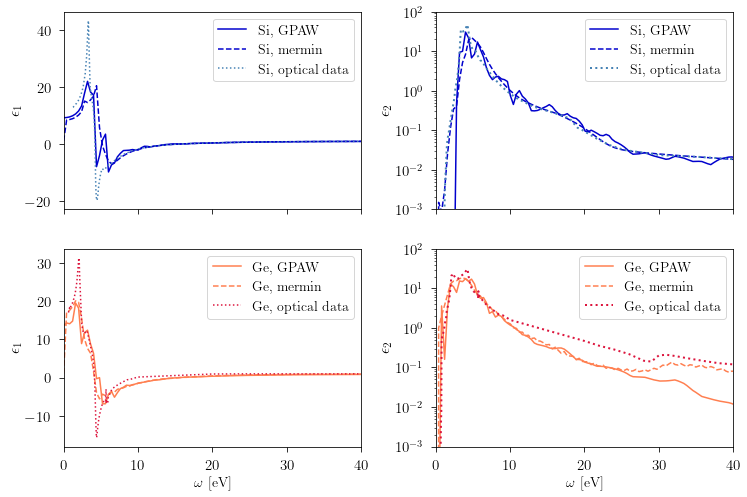

In [10]:
fig, axs = plt.subplots(2,2,figsize=(12, 8),sharex=True)
fig.subplots_adjust(wspace=0.25)

omvec = np.linspace(0,80,200)

### Epsilon1, Si
y1 = [Si.eps1(omi,omi) for omi in omvec]
y2 = [Si_mermin.eps1(omi,omi) for omi in omvec]
axs[0][0].plot(omvec,y1,color='MediumBlue',label='Si, GPAW')
axs[0][0].plot(omvec,y2,color='MediumBlue',linestyle='--',label='Si, mermin')

dat = np.loadtxt('data/Si-handbook-nk.txt').T
axs[0][0].plot(dat[0],dat[1]**2 - dat[2]**2,color='SteelBlue',
         linestyle=':', label=r'Si, optical data')

axs[0][0].set_yscale('linear')
axs[0][0].set_xlim([0,15])
axs[0][0].legend(loc='upper right')
axs[0][0].set_ylabel(r'$\epsilon_1$',fontsize=16)

### Epsilon2, Si
y1 = [Si.eps2(omi,omi) for omi in omvec]
y2 = [Si_mermin.eps2(omi,omi) for omi in omvec]
axs[0][1].plot(omvec,y1,color='MediumBlue',label='Si, GPAW')
axs[0][1].plot(omvec,y2,color='MediumBlue',linestyle='--',label='Si, mermin')

axs[0][1].plot(dat[0],dat[1]*dat[2]*2.0,color='SteelBlue',
         linestyle=':', label=r'Si, optical data', linewidth=2.0)

axs[0][1].set_yscale('log')
axs[0][1].set_ylim([1e-3,1e2])
axs[0][1].set_xlim([0,40])
axs[0][1].legend(loc='upper right')
axs[0][1].set_ylabel(r'$\epsilon_2$',fontsize=16)

### Epsilon1, Ge

y1 = [Ge.eps1(omi,omi) for omi in omvec]
y2 = [Ge_mermin.eps1(omi,omi) for omi in omvec]
axs[1][0].plot(omvec,y1,color='Coral',label='Ge, GPAW')
axs[1][0].plot(omvec,y2,color='Coral',linestyle='--',label='Ge, mermin')

dat = np.loadtxt('data/Ge-handbook-nk.txt').T
axs[1][0].plot(dat[0],dat[2]**2 - dat[3]**2,color='Crimson',
         linestyle=':', label=r'Ge, optical data')

axs[1][0].set_yscale('linear')
axs[1][0].set_xlim([0,15])
axs[1][0].legend(loc='upper right')
axs[1][0].set_xlabel(r'$\omega$ [eV]')
axs[1][0].set_ylabel(r'$\epsilon_1$',fontsize=16)

### Epsilon2, Ge
y1 = [Ge.eps2(omi,omi) for omi in omvec]
y2 = [Ge_mermin.eps2(omi,omi) for omi in omvec]
axs[1][1].plot(omvec,y1,color='Coral',label='Ge, GPAW')
axs[1][1].plot(omvec,y2,color='Coral',linestyle='--',label='Ge, mermin')

axs[1][1].plot(dat[0],dat[2]*dat[3]*2.0,color='Crimson',
         linestyle=':', label=r'Ge, optical data', linewidth=2.0)

axs[1][1].set_yscale('log')
axs[1][1].set_ylim([1e-3,1e2])
axs[1][1].set_xlim([0,40])
axs[1][1].legend(loc='upper right')
axs[1][1].set_xlabel(r'$\omega$ [eV]')
axs[1][1].set_ylabel(r'$\epsilon_2$',fontsize=16)

fig.savefig(plotdir+"darkelf_epsilon_1.pdf",bbox_inches='tight')


Same, for ELF

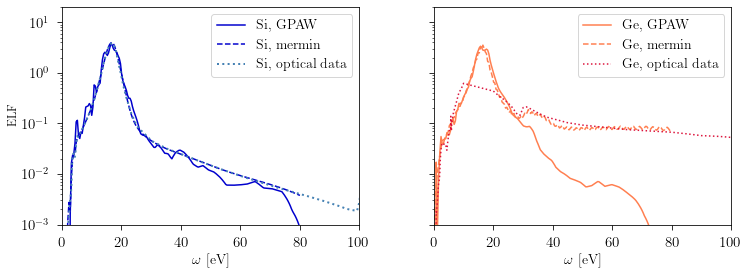

In [11]:
fig, axs = plt.subplots(1,2,figsize=(12, 4),sharey=True)
fig.subplots_adjust(wspace=0.25)

omvec = np.linspace(0,80,200)

### ELF, Si
y1 = [Si.elf(omi,omi) for omi in omvec]
y2 = [Si_mermin.elf(omi,omi) for omi in omvec]
axs[0].plot(omvec,y1,color='MediumBlue',label='Si, GPAW')
axs[0].plot(omvec,y2,color='MediumBlue',linestyle='--',label='Si, mermin')

dat = np.loadtxt('data/Si-handbook-nk.txt').T
dat_eps1 = dat[1]**2 - dat[2]**2
dat_eps2 = dat[1]*dat[2]*2.0
axs[0].plot(dat[0],dat_eps2/(dat_eps2**2 + dat_eps1**2),color='SteelBlue',
         linestyle=':', label=r'Si, optical data',linewidth=2.0)

axs[0].set_yscale('log')
axs[0].set_ylim([1e-3,20])
axs[0].set_xlim([0,100])
axs[0].legend(loc='upper right')
axs[0].set_xlabel(r'$\omega$ [eV]')
axs[0].set_ylabel(r'ELF',fontsize=12)

### Epsilon1, Ge

y1 = [Ge.elf(omi,omi) for omi in omvec]
y2 = [Ge_mermin.elf(omi,omi) for omi in omvec]
axs[1].plot(omvec,y1,color='Coral',label='Ge, GPAW')
axs[1].plot(omvec,y2,color='Coral',linestyle='--',label='Ge, mermin')

dat = np.loadtxt('data/Ge-handbook-nk.txt').T
dat_eps1 = dat[2]**2 - dat[3]**2
dat_eps2 = dat[2]*dat[3]*2.0
axs[1].plot(dat[0],dat_eps2/(dat_eps2**2 + dat_eps1**2),color='Crimson',
         linestyle=':', label=r'Ge, optical data')

axs[1].set_yscale('log')
axs[1].set_ylim([1e-3,20])
axs[1].set_xlim([0,100])
axs[1].legend(loc='upper right')
axs[1].set_xlabel(r'$\omega$ [eV]')

fig.savefig(plotdir+"darkelf_epsilon_2.pdf",bbox_inches='tight')

Note the Ge data set is very coarse below 20 eV, which is why it does not reproduce the plasmon resonance. The GPAW calculation for Ge also does not include semi-core electrons, which contribute at energies of 30 eV and above

## optical limit (k=0) in phonon regime

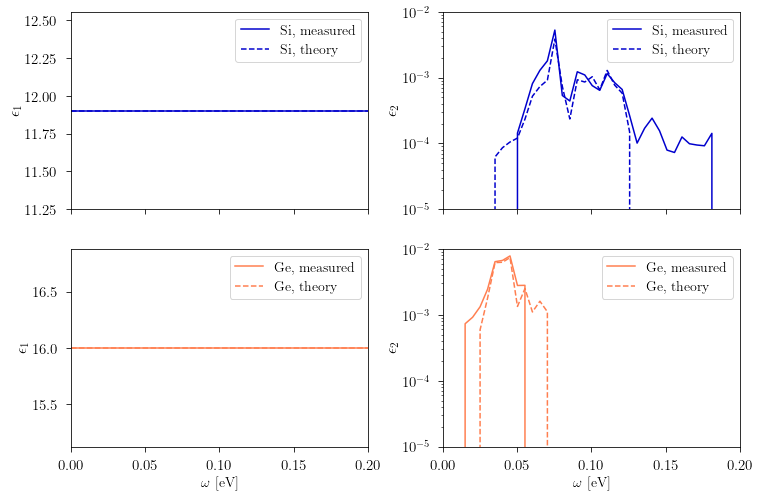

In [12]:
fig, axs = plt.subplots(2,2,figsize=(12, 8),sharex=True)
fig.subplots_adjust(wspace=0.25)

omvec = np.linspace(0,1,200)

### Epsilon1, Si
y1 = [Si.eps1(omi,omi,method="phonon") for omi in omvec]
y2 = [Si_phonon_theory.eps1(omi,omi,method="phonon") for omi in omvec]
axs[0][0].plot(omvec,y1,color='MediumBlue',label='Si, measured')
axs[0][0].plot(omvec,y2,color='MediumBlue',linestyle='--',label='Si, theory')

axs[0][0].set_yscale('linear')
axs[0][0].set_xlim([0,0.2])
axs[0][0].legend(loc='upper right')
axs[0][0].set_ylabel(r'$\epsilon_1$',fontsize=16)

### Epsilon2, Si
y1 = [Si.eps2(omi,omi,method="phonon") for omi in omvec]
y2 = [Si_phonon_theory.eps2(omi,omi,method="phonon") for omi in omvec]
axs[0][1].plot(omvec,y1,color='MediumBlue',label='Si, measured')
axs[0][1].plot(omvec,y2,color='MediumBlue',linestyle='--',label='Si, theory')

axs[0][1].set_yscale('log')
axs[0][1].set_ylim([1e-5,1e-2])
axs[0][1].set_xlim([0,0.2])
axs[0][1].legend(loc='upper right')
axs[0][1].set_ylabel(r'$\epsilon_2$',fontsize=16)

### Epsilon1, Ge

y1 = [Ge.eps1(omi,omi,method="phonon") for omi in omvec]
y2 = [Ge_phonon_theory.eps1(omi,omi,method="phonon") for omi in omvec]
axs[1][0].plot(omvec,y1,color='Coral',label='Ge, measured')
axs[1][0].plot(omvec,y2,color='Coral',linestyle='--',label='Ge, theory')


axs[1][0].set_yscale('linear')
axs[1][0].set_xlim([0,0.2])
axs[1][0].legend(loc='upper right')
axs[1][0].set_xlabel(r'$\omega$ [eV]')
axs[1][0].set_ylabel(r'$\epsilon_1$',fontsize=16)

### Epsilon2, Ge
y1 = [Ge.eps2(omi,omi,method="phonon") for omi in omvec]
y2 = [Ge_phonon_theory.eps2(omi,omi,method="phonon") for omi in omvec]
axs[1][1].plot(omvec,y1,color='Coral',label='Ge, measured')
axs[1][1].plot(omvec,y2,color='Coral',linestyle='--',label='Ge, theory')

axs[1][1].set_yscale('log')
axs[1][1].set_ylim([1e-5,1e-2])
axs[1][1].set_xlim([0,0.2])
axs[1][1].legend(loc='upper right')
axs[1][1].set_xlabel(r'$\omega$ [eV]')
axs[1][1].set_ylabel(r'$\epsilon_2$',fontsize=16)

fig.savefig(plotdir+"darkelf_epsilon_3.pdf",bbox_inches='tight')

Same for ELF

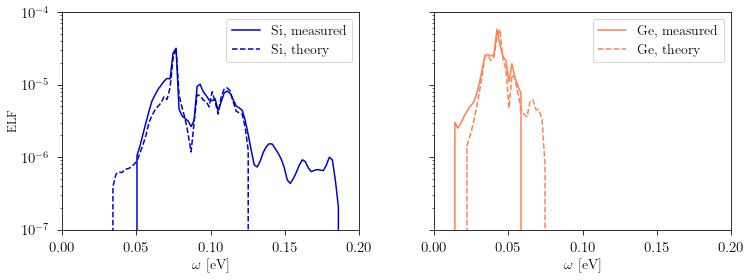

In [13]:
fig, axs = plt.subplots(1,2,figsize=(12, 4),sharey=True)
fig.subplots_adjust(wspace=0.25)

omvec = np.linspace(0,0.2,100)

### ELF, Si
y1 = [Si.elf(omi,omi,method="phonon") for omi in omvec]
y2 = [Si_phonon_theory.elf(omi,omi,method="phonon") for omi in omvec]
axs[0].plot(omvec,y1,color='MediumBlue',label='Si, measured')
axs[0].plot(omvec,y2,color='MediumBlue',linestyle='--',label='Si, theory')

axs[0].set_yscale('log')
axs[0].set_ylim([1e-7,1e-4])
axs[0].set_xlim([0,0.2])
axs[0].legend(loc='upper right')
axs[0].set_xlabel(r'$\omega$ [eV]')
axs[0].set_ylabel(r'ELF',fontsize=12)

### Epsilon1, Ge

y1 = [Ge.elf(omi,omi,method="phonon") for omi in omvec]
y2 = [Ge_phonon_theory.elf(omi,omi,method="phonon") for omi in omvec]
axs[1].plot(omvec,y1,color='Coral',label='Ge, measured')
axs[1].plot(omvec,y2,color='Coral',linestyle='--',label='Ge, theory')


axs[1].set_yscale('log')
axs[1].set_ylim([1e-7,1e-4])
axs[1].set_xlim([0,0.2])
axs[1].legend(loc='upper right')
axs[1].set_xlabel(r'$\omega$ [eV]')

fig.savefig(plotdir+"darkelf_epsilon_4.pdf",bbox_inches='tight')

## finite k, electron regime 

This limit is relevant for scattering.

In [14]:
kvals = np.linspace(10,1e4,400)*1e-3
ovals = np.linspace(0.01,80,160)
Nomega = len(ovals)
Nk = len(kvals)

z1_grid = np.zeros((Nomega,Nk))
z2_grid = np.zeros((Nomega,Nk))
ELF_Lindhard = np.zeros((Nomega,Nk))
ELF_mermin = np.zeros((Nomega,Nk))
ELF_gpaw = np.zeros((Nomega,Nk))

for j in range(Nk):
    for i in range(Nomega):
        ELF_gpaw[i][j] = Si.elf(ovals[i],kvals[j]*1e3)
        ELF_mermin[i][j] = Si_mermin.elf(ovals[i],kvals[j]*1e3)
        ELF_Lindhard[i][j] = Si_mermin.elf(ovals[i],kvals[j]*1e3,method="Lindhard")

/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87939/2167227869.py:22: RuntimeWarning: divide by zero encountered in log10
  img0=ax[0].contourf(kvals,ovals,np.log10(ELF_Lindhard),levels,origin='lower',
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87939/2167227869.py:24: RuntimeWarning: divide by zero encountered in log10
  img1=ax[1].contourf(kvals,ovals,np.log10(ELF_mermin),levels,origin='lower',
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87939/2167227869.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


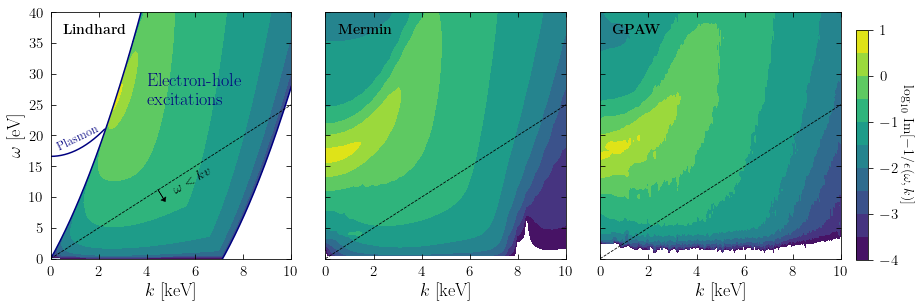

In [15]:
fig, ax = plt.subplots(1,3,sharey=True)
fig.set_figheight(4.5)
fig.set_figwidth(12)

levels = np.linspace(-4,1,11)

kF = 3335.6
wp = 15.
kF = Si_mermin.kF
wp = Si_mermin.omegap
vF = kF/511e3
eVtoA0 = 1973.2

xx = np.linspace(10,1e4,400)
ax[0].fill_between(xx*1e-3,(xx**2 - 2*xx*kF)/(2*511e3),(xx**2 + 2*xx*kF)/(2*511e3),color='SteelBlue',alpha=0.3)
xx = np.linspace(0,2230,200)
ax[0].plot(xx*1e-3,wp*(1 + 0.3*vF**2/wp**2*xx**2),color='Navy')
xx = np.linspace(0,10000,200)
ax[0].plot(xx*1e-3,(xx**2 + 2*xx*kF)/(2*511e3),color='Navy')
ax[0].plot(xx*1e-3,(xx**2 - 2*xx*kF)/(2*511e3),color='Navy')

img0=ax[0].contourf(kvals,ovals,np.log10(ELF_Lindhard),levels,origin='lower',
                      extent = [min(kvals),max(kvals),min(ovals),max(ovals)])
img1=ax[1].contourf(kvals,ovals,np.log10(ELF_mermin),levels,origin='lower',
                      extent = [min(kvals),max(kvals),min(ovals),max(ovals)])
img2=ax[2].contourf(kvals,ovals,np.log10(ELF_gpaw),levels,origin='lower',
                      extent = [min(kvals),max(kvals),min(ovals),max(ovals)])
#ax.clabel(img1,colors='w')
#fig.colorbar(img2,ax=ax[2])
#fig.colorbar(img2,  ax=ax.ravel().tolist(), orientation='vertical')
cb=fig.colorbar(img2, ax=ax.ravel().tolist(),anchor=(2.1,1.05),shrink=0.94)
cb.set_label("$\log_{10}$ Im[$-1/\epsilon(\omega, k)]$",rotation=-90,labelpad=15)

ax[0].set_ylim([0,40])
ax[0].set_xlim([0,10])
ax[0].set_xlabel('$k$ [keV]',fontsize=18)
ax[0].set_ylabel('$\omega$ [eV]',fontsize=18)
ax[0].tick_params(bottom=True,right=True,top=True,direction='in',which='both')
ax[0].text(4,25,'Electron-hole \n excitations',color='Navy',fontsize=18)
ax[0].text(0.20,17.5,'Plasmon',color='Navy',rotation=26,fontsize=12)
ax[0].text(0.5,36.5,r'{\bf Lindhard}',color='black')
ax[0].plot(xx*1e-3,xx*2.5*1e-3,color='black',linestyle='--',linewidth=0.8)
ax[0].text(5,10.5,'$\omega < k v$',color='k',rotation='30')
ax[0].arrow(0.445,0.28, 0.023, -0.036, head_width=0.025, head_length=0.015,
            linewidth=0.5,fc='k', ec='k', transform=ax[0].transAxes)
#ax[0].set_title(r'Si $\log_{10}$ Im($-1/\epsilon(\omega, k))$')

ax[1].set_ylim([0,40])
ax[1].set_xlim([0,10])
ax[1].set_xlabel('$k$ [keV]',fontsize=18)
ax[1].tick_params(bottom=True,right=True,top=True,direction='in',which='both')
ax[1].text(0.5,36.5,r'{\bf Mermin}',color='black')
ax[1].plot(xx*1e-3,xx*2.5*1e-3,color='black',linestyle='--',linewidth=0.8)
#ax[1].set_title(r'Si $\log_{10}$ Im($-1/\epsilon(\omega, k))$')

ax[2].set_ylim([0,40])
ax[2].set_xlim([0,10])
ax[2].set_xlabel('$k$ [keV]',fontsize=18)
ax[2].tick_params(bottom=True,right=True,top=True,direction='in',which='both')
ax[2].text(0.5,36.5,r'{\bf GPAW}',color='black')
ax[2].plot(xx*1e-3,xx*2.5*1e-3,color='black',linestyle='--',linewidth=0.8)
#ax[2].set_title(r'Si $\log_{10}$ Im($-1/\epsilon(\omega, k))$')

fig.tight_layout()
fig.savefig(plotdir+"darkelf_epsilon_5.pdf",bbox_inches='tight')

/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87939/1650561425.py:77: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[1][i].set_yscale("Log")
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87939/1650561425.py:77: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[1][i].set_yscale("Log")
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87939/1650561425.py:77: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  axs[1][i].set_yscale("Log")
/var/folders/rg/bnkv6w611wd9wt6wb3m9n5mm0000gn/T/ipykernel_87939/1650561425.py:77: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  

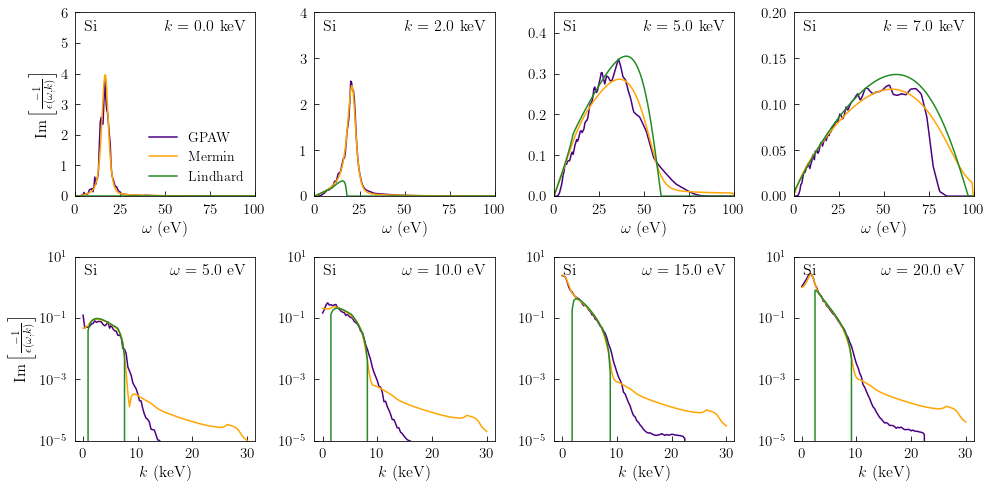

In [16]:
fig, axs = plt.subplots(2, 4,figsize=(14, 7))
rc('xtick', labelsize=14)
rc('ytick', labelsize=14)
plt.subplots_adjust(top = 0.93, bottom=0.01, hspace=0.1, wspace=0.2)


# first row, plots as function of omega
#######################################
# omega and k grid
olist=np.linspace(0,100,200)
klist=[ 1.0, 2.0e3, 5.0e3 , 7.0e3 ]
   
# loop over the momenta
for i in range(len(klist)):
    k=klist[i]
    
    # calculate ELF as function of omega
    ELF_gpaw=list(map(lambda om: Si.elf(om,k),olist))
    ELF_mermin=list(map(lambda om: Si_mermin.elf(om,k),olist))
    ELF_Lindhard=list(map(lambda om: Si_mermin.elf(om,k,method="Lindhard"),olist))

    # plot
    axs[0][i].plot(olist,ELF_gpaw,
                   label="GPAW",
                  color="Indigo")
    axs[0][i].plot(olist,ELF_mermin,
                   label=r"Mermin",
                   color="orange")
    axs[0][i].plot(olist,ELF_Lindhard,
                   label=r"Lindhard",
                   color="forestgreen")
    axs[0][i].set_xlabel(r"$\omega$ (eV)",fontsize=16)
    axs[0][i].set_xlim([0,100])
    axs[0][i].tick_params(bottom=True,direction='in',which='both')
    
axs[0][0].set_ylim([0,6])
axs[0][1].set_ylim([0,4])
axs[0][2].set_ylim([0,0.45])
axs[0][3].set_ylim([0,0.2])
axs[0][0].legend(loc="lower right",frameon=False)
axs[0][0].set_ylabel(r"$\mathrm{Im}\left[\frac{-1}{\epsilon(\omega,k)}\right]$",fontsize=16)

# add some decoration
for i in range(4):
    axs[0][i].text(0.05,0.9,"Si",fontsize=16,transform = axs[0][i].transAxes)
    axs[0][i].text(0.95,0.9,r"$k=$ "+str(np.round(klist[i]*1e-3,0))+" keV",transform = axs[0][i].transAxes,fontsize=16,horizontalalignment="right")
    

    
# second row, plots as function of k
#######################################    
    
# omega and k grid
olist=[5.0,10.0,15.0,20.0]
klist=np.linspace(0.1,3e4,100)

# loop over the omega
for i in range(len(olist)):
    om=olist[i]
    
    # calculate ELF as function of k
    ELF_gpaw=list(map(lambda k: Si.elf(om,k),klist))
    ELF_mermin=list(map(lambda k: Si_mermin.elf(om,k),klist))
    ELF_Lindhard=list(map(lambda k: Si_mermin.elf(om,k,method="Lindhard"),klist))

    # plot
    axs[1][i].plot(klist*1e-3,ELF_gpaw,
                   label="GPAW",
                  color="Indigo")
    axs[1][i].plot(klist*1e-3,ELF_mermin,
                   label=r"Mermin",
                   color="orange")
    axs[1][i].plot(klist*1e-3,ELF_Lindhard,
                   label=r"Lindhard",
                   color="forestgreen")
    axs[1][i].set_xlabel(r"$k$ (keV)",fontsize=16)
    axs[1][i].set_yscale("Log")
    axs[1][i].set_ylim([1e-5,10])
    axs[1][i].tick_params(bottom=True,direction='in',which='both')
    
#axs[0].set_ylim([0,6])
#axs[1].set_ylim([0,4])
#axs[2].set_ylim([0,0.45])
#axs[3].set_ylim([0,0.2])
#axs[1][0].legend(loc=(0.5,0.7),frameon=False)
axs[1][0].set_ylabel(r"$\mathrm{Im}\left[\frac{-1}{\epsilon(\omega,k)}\right]$",fontsize=16)
#axs[0].set_xscale("Log")
axs[1][0].set_yscale("Log")

# add some decoration
for i in range(len(olist)):
    axs[1][i].text(0.05,0.9,"Si",fontsize=16,transform = axs[1][i].transAxes)
    axs[1][i].text(0.95,0.9,r"$\omega=$ "+str(np.round(olist[i],0))+" eV",transform = axs[1][i].transAxes,fontsize=16,horizontalalignment="right")
    
fig.tight_layout()     
    

fig.savefig(plotdir+"darkelf_epsilon_6.pdf",bbox_inches='tight')


## citation for Mermin data

Please cite the corresponding experimental papers if you use the mermin method. When using the GPAW method, please cite the GPAW code.

In [17]:
Si.mermin_ref

'Y. Sun, H. Xu, B. Da, S.-f. Mao and Z.-j. Ding, Calculations of Energy-Loss Function for 26 Materials, Chinese Journal of Chemical Physics 9 (2016) 663.'